# Python Practice: Hostname Dataset Generation and Analysis
This notebook was created as part of the *Python Fundamentals* and *Advanced Python* modules in the Big Data & Data Science Master's program.

In this project, we:
- Generate a dataset of random server hostnames
- Convert the data into a Pandas DataFrame
- Visualize key aspects using Matplotlib


## Step 1: Import Required Libraries
We'll start by importing the libraries we need.

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Step 2: Generate Random Hostnames
Here we define the function to create synthetic hostnames.

In [2]:
# We initialize some variables that we will modify later
hostnames = []
dataset = []
df = None

In [3]:
# We define function to generate hostnames
def set_hostnames(number_of_hosts: int) -> None:
    os = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10   #40% Linux / 30% Solaris / 20% AIX / 10% HP-UX
    environment = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30  #10% Development / 10% Integration / 25% Testing / 25% Staging / 30% Production
    countries = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30  #6% Norway / 9% France / 16% Italy / 16% Spain / 23% Germany / 30% Ireland
    grupo_alpha = []
    
    
    for i in range(number_of_hosts):
        country = random.choice(countries)
        host = random.choice(os) + random.choice(environment)
        host += country
        grupo_alpha.append(host)
        host += str(grupo_alpha.count(host)).zfill(3)
        hostnames.append(host)

In [4]:
# OS Name Function
def get_os(hostname: str) -> str:
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else:
        return 'Unkown'

In [5]:
# Function to get the name of the environment
def get_environment(hostname: str) -> str:
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else:
        return 'Unkown'

In [6]:
# Function to get the country name
def get_country(hostname: str) -> str:
    countries_code = {
        'NOR': 'Norway',
        'FRA': 'France',
        'ITA': 'Italy',
        'ESP': 'Spain',
        'DEU': 'Germany',
        'IRL': 'Ireland'
    }
    return countries_code.get(hostname[2:5], 'Unknown')

## Step 3: Create Pandas DataFrame
We transform the hostname data into a structured DataFrame.

In [7]:
# Function to generate the DataFrame
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)

    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'environment': get_environment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
        
    df = pd.DataFrame(dataset)

# We create the DataFrame
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,HPNOR001,HP-UX,Production,Norway,1
1,STIRL001,Solaris,Testing,Ireland,1
2,SSESP001,Solaris,Staging,Spain,1
3,LSNOR001,Linux,Staging,Norway,1
4,LPITA001,Linux,Production,Italy,1
...,...,...,...,...,...
1495,LIESP014,Linux,Integration,Spain,14
1496,LTESP029,Linux,Testing,Spain,29
1497,APESP014,AIX,Production,Spain,14
1498,LDNOR005,Linux,Development,Norway,5


In [8]:
# We save the DataFrame in a CSV file, inside the 'datasets' folder
df.to_csv(
    r'datasets/hosts.csv',
    header=True,
    index=False
)

# Leer el archivo CSV generado
hosts_df = pd.read_csv(
    r'datasets/hosts.csv',
    index_col=None,
    encoding='ISO-8859-1'
)

print(hosts_df.head())

   hostname       os environment  country  node
0  HPNOR001    HP-UX  Production   Norway     1
1  STIRL001  Solaris     Testing  Ireland     1
2  SSESP001  Solaris     Staging    Spain     1
3  LSNOR001    Linux     Staging   Norway     1
4  LPITA001    Linux  Production    Italy     1


## Step 4: Visualize the Data
Using Matplotlib, we generate charts to explore the dataset.

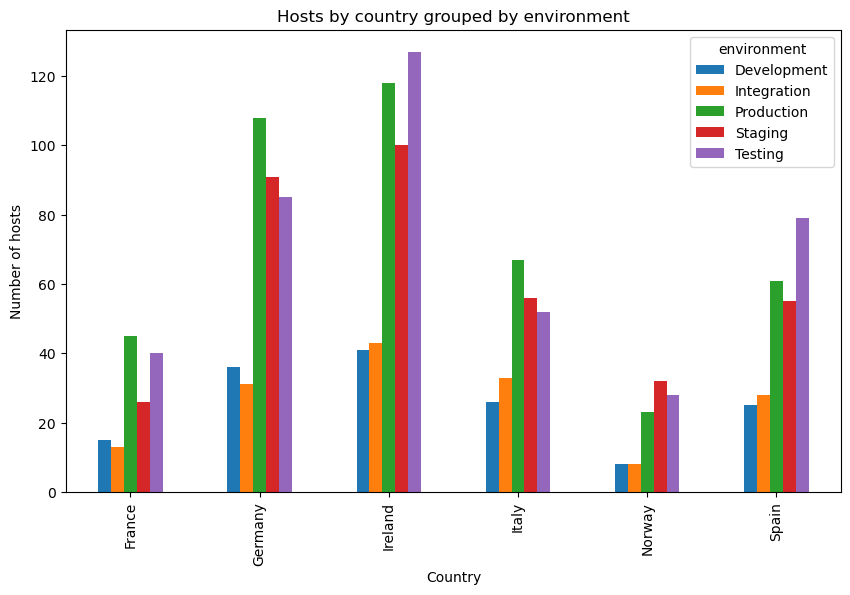

In [9]:
# We generate a bar graph grouping the environment for each country
country_environment = hosts_df.groupby(['country', 'environment']).size()
country_environment.unstack().plot(kind='bar', figsize=(10, 6))

plt.title('Hosts by country grouped by environment')
plt.xlabel('Country')
plt.ylabel('Number of hosts')
plt.show()

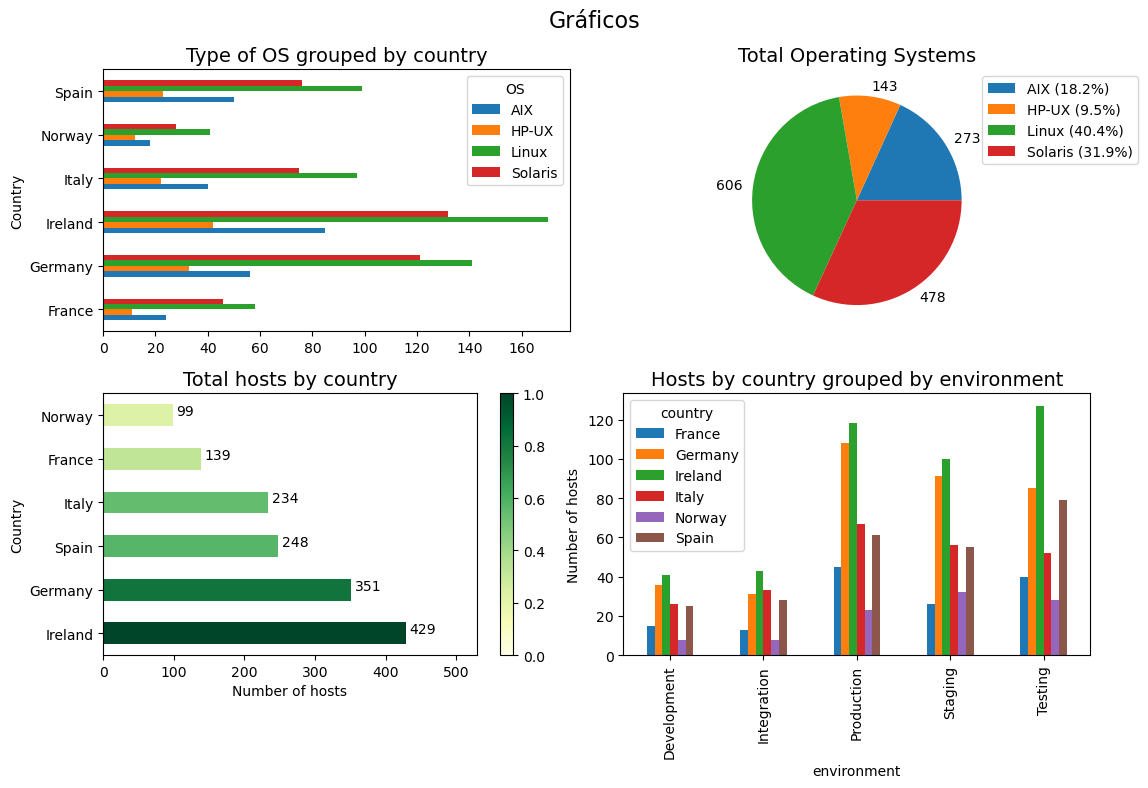

In [10]:
# We create a figure with 4 graphs in a mesh of 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Figure 1: Type of OS grouped by country

os_by_country = hosts_df.groupby(['country', 'os']).size()
os_by_country.unstack().plot(kind='barh', ax=axs[0, 0])

axs[0, 0].set_title('Type of OS grouped by country', fontsize=14)
axs[0, 0].set_ylabel('Country')

axs[0, 0].legend(title='OS', loc='upper right', bbox_to_anchor=(1, 1))


# Figure 2: Total Operating Systems

total_os = hosts_df.groupby('os').size()
label_index = total_os.values
total_os.plot(kind='pie', ax=axs[0,1], labels=label_index)

axs[0, 1].set_title('Total Operating Systems', fontsize=14)

labels=total_os.index.map(lambda x: f'{x} ({total_os[x] / total_os.sum() * 100:.1f}%)')

axs[0, 1].legend(labels=labels, loc='upper right', bbox_to_anchor=(1.6, 1))


# Figure 3: Total hosts by country

palette = sns.color_palette("YlGn", as_cmap=True)

total_hosts_by_country = hosts_df['country'].value_counts()
total_hosts_by_country.sort_values(ascending=False).plot(
    kind='barh', ax=axs[1,0], xlim=(0, total_hosts_by_country.max() + 100),
    color=palette(total_hosts_by_country.values / total_hosts_by_country.max())
)

for i, v in enumerate(total_hosts_by_country):
    axs[1, 0].text(v + 5, i, f"{v}")
    
axs[1, 0].set_title('Total hosts by country', fontsize=14)
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')

fig.colorbar(cm.ScalarMappable(cmap=palette), ax=axs[1, 0])


# Figure 4: Hosts by country grouped by environment

hosts_by_country_environment = hosts_df.groupby(["country", "environment"])["hostname"].size()
hosts_by_country_environment.unstack(0).plot(kind='bar', ax=axs[1,1])

axs[1, 1].set_title('Hosts by country grouped by environment', fontsize=14)
axs[1, 1].set_ylabel('Number of hosts')

# We adjust margins and spaces between charts and insert general title
fig.suptitle('Gráficos', fontsize=16)
plt.tight_layout()
plt.show()

## Conclusion
This exercise illustrates the basics of data generation, DataFrame manipulation, and visualization with Python.